In [34]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import shutil
import os

In [10]:
# https://medium.com/mlearning-ai/yolov5-for-segmentation-fab39c3487f6

def read_image_label(path_to_img: str, path_to_txt: str, normalize: bool = True) -> tuple[np.array, np.array]:
    
    # read image
    image = cv2.imread(path_to_img)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    img_h, img_w = image.shape[:2]
  
    # read .txt file for this image
    with open(path_to_txt, "r") as f:
        txt_file = f.readlines()[0].split()
        cls_idx = txt_file[0]
        coords = txt_file[1:]
        polygon = np.array([[eval(x), eval(y)] for x, y in zip(coords[0::2], coords[1::2])]) # convert list of coordinates to numpy massive
  
    # Convert normilized coordinates of polygons to coordinates of image
    if normalize:
        polygon[:,0] = polygon[:,0]*img_w
        polygon[:,1] = polygon[:,1]*img_h
        polygon = polygon.astype(int)
    return image, polygon


def show_image_mask(img: np.array, polygon: np.array, alpha: float = 0.7):
    
    # Create zero array for mask
    mask = np.zeros((img.shape[0], img.shape[1])) # , dtype=np.uint8
    overlay = img.copy()
    
    # Draw polygon on the image and mask
    cv2.fillPoly(mask, pts=[polygon], color=(255, 255, 255))
    cv2.fillPoly(img, pts=[polygon], color=(255, 0, 0))
    cv2.addWeighted(overlay, alpha, img, 1 - alpha, 0, img) #image
    
    # Plot image with mask
    fig = plt.figure(figsize=(22,18))
    axes = fig.subplots(nrows=1, ncols=2)
    axes[0].imshow(img)
    axes[1].imshow(mask, cmap="Greys_r")
    axes[0].set_title("Original image with mask")
    axes[1].set_title("Mask")
    
    print()

    plt.show()

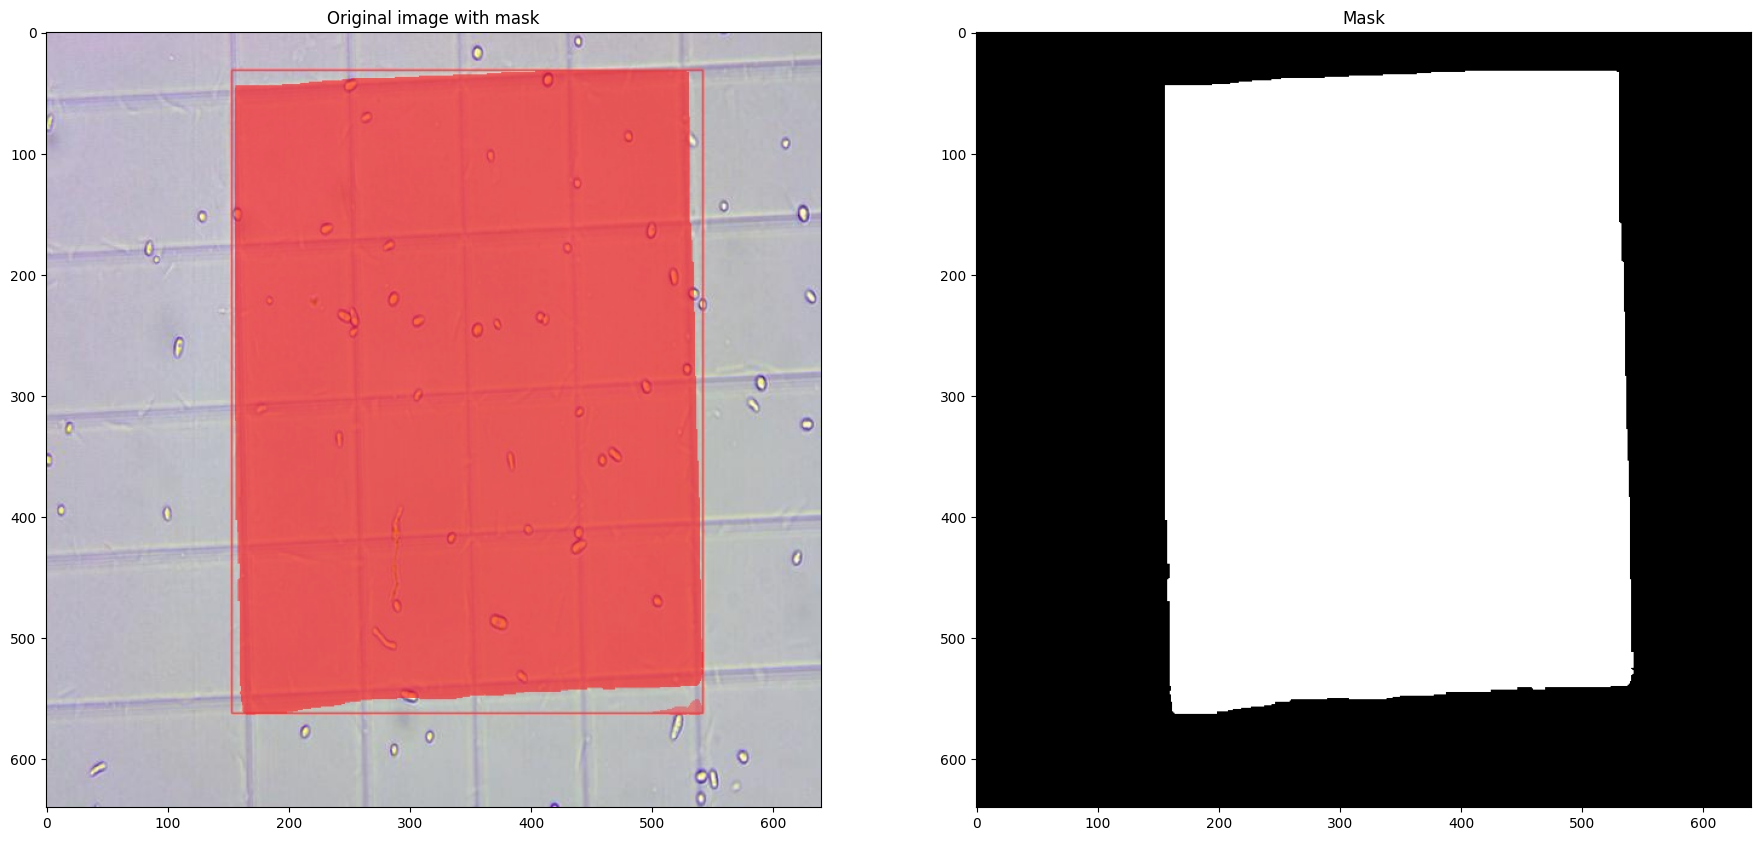

In [11]:
image, polygon = read_image_label('./data_temp/6b63ee92-d37b20a8-81.jpg', 
                                  './data_temp/6b63ee92-d37b20a8-81.txt',
                                  )
show_image_mask(image, polygon)

In [12]:
image = cv2.imread('./data_temp/6b63ee92-d37b20a8-81.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
img_h, img_w = image.shape[:2]

with open('./data_temp/6b63ee92-d37b20a8-81.txt', "r") as f:
        txt_file = f.readlines()[0].split()
        cls_idx = txt_file[0]
        coords = txt_file[1:]
        polygon = np.array([[eval(x), eval(y)] for x, y in zip(coords[0::2], coords[1::2])])
        polygon[:,0] = polygon[:,0]*img_w
        polygon[:,1] = polygon[:,1]*img_h
        polygon = polygon.astype(int)

mask = np.zeros((image.shape[0], image.shape[1])) # , dtype=np.uint8
overlay = image.copy()

# Draw polygon on the image and mask
mask_for_coords = np.where(cv2.fillPoly(mask, pts=[polygon], color=(255, 255, 255))>0, 1, 0)
mask_for_coords[100] # значения 100-ой строки

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [13]:
mask_for_coords[114, 269]

1

In [14]:
def ch_str(str_with_nums):
    return np.array(list(map(float, str_with_nums.strip().split()))).astype(int)

with open('./data_temp/6b63ee92-d37b20a8-81_boxes.txt', "r") as f:
    boxes = f.readlines()
    boxes = list(map(ch_str, boxes))

In [15]:
int((boxes[0][0]+boxes[0][2])/2)

109

In [16]:
num_blasto = 0
for item in boxes:
    if mask_for_coords[int((item[0]+item[2])/2), int((item[1]+item[3])/2)]==1:
        num_blasto += 1
print(num_blasto)

38


In [22]:
from yolov5.segment import predict
predict.run(weights='./model/model_for_grid_segm.pt', 
            source='./data_temp/6b63ee92-d37b20a8-81_origin.jpg', 
            save_txt=True,
            project='./data_temp',
            name='segm')

YOLOv5  2023-6-22 Python-3.10.11 torch-1.13.1+cpu CPU



Fusing layers... 
Model summary: 165 layers, 7398422 parameters, 0 gradients, 25.7 GFLOPs
image 1/1 C:\Users\jaffa\Projects\calc_blastos\data_temp\6b63ee92-d37b20a8-81_origin.jpg: 480x640 1 grid, 1849.6ms
Speed: 10.5ms pre-process, 1849.6ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)
Results saved to data_temp\segm2
1 labels saved to data_temp\segm2\labels


In [45]:
img_name = '6b63ee92-d37b20a8-81.jpg'
folder_name = 'temp_folder'
path_to_pred_img = './image_folder/images_to_predict'

path_to_wghts_model_segm = './model/model_for_grid_segm.pt' # добавить в config

img_fold_name = './image_folder' # добавить в config
temp_segm = 'temp_segm'         # добавить в config

redused_img_size = 640 # взять из config

predicted_path_img = './image_folder/predicted_images'


from yolov5.segment import predict
predict.run(weights=path_to_wghts_model_segm, 
            source=os.path.join(path_to_pred_img, folder_name, img_name),  # брать из во время предсказания boxes
            save_txt=True,
            project=img_fold_name,                 
            name=temp_segm)                         


image = cv2.imread(os.path.join(path_to_pred_img, folder_name, img_name))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
img_h, img_w = image.shape[:2]


with open(os.path.join(img_fold_name, temp_segm, 'labels', img_name)[:-4]+'.txt', "r") as f:
        txt_file = f.readlines()[0].split()
        coords = txt_file[1:]
        polygon = np.array([[eval(x), eval(y)] for x, y in zip(coords[0::2], coords[1::2])])
        polygon[:,0] = (polygon[:,0]/img_w)*redused_img_size
        polygon[:,1] = (polygon[:,1]/img_h)*redused_img_size
        polygon = polygon.astype(int)


mask = np.zeros((redused_img_size, redused_img_size)) # , dtype=np.uint8
mask_for_coords = np.where(cv2.fillPoly(mask, pts=[polygon], color=(255, 255, 255))>0, 1, 0)


with open(os.path.join(predicted_path_img, folder_name, img_name)[:-4] +'_boxes.txt', "r") as f:
    boxes = f.readlines()
    boxes = list(map(ch_str, boxes))


num_blasto = 0
for item in boxes:
    if mask_for_coords[int((item[0]+item[2])/2), int((item[1]+item[3])/2)]==1:
        num_blasto += 1
print(num_blasto)


#shutil.rmtree(os.path.join(img_fold_name, temp_segm))

YOLOv5  2023-6-22 Python-3.10.11 torch-1.13.1+cpu CPU



Fusing layers... 
Model summary: 165 layers, 7398422 parameters, 0 gradients, 25.7 GFLOPs
image 1/1 C:\Users\jaffa\Projects\calc_blastos\image_folder\images_to_predict\temp_folder\6b63ee92-d37b20a8-81.jpg: 480x640 1 grid, 1843.3ms
Speed: 5.0ms pre-process, 1843.3ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)
Results saved to image_folder\temp_segm2
1 labels saved to image_folder\temp_segm2\labels


38
